Dragon Real Estate -Price Predictor

In [1]:
import jupyter
import matplotlib
import scipy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [2]:
housing = pd.read_csv ('housing.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,NaN,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       505 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing['CRIM'].value_counts().head()

CRIM
0.01501     2
14.33370    2
0.03466     1
0.03113     1
0.03049     1
Name: count, dtype: int64

In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,505.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284059,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703195,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
def split_train_test (data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(test_ratio*len(data))
    test_index = shuffled[:test_set_size]
    train_index = shuffled[test_set_size:]
    return data.iloc[test_index], data.iloc[train_index]

#Train-Test Splitting

In [7]:

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print ("test_size = {0}\n train_size = {1}\n".format(len(train_set), len(test_set)))

test_size = 404
 train_size = 102



In [8]:

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['CHAS']):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]

In [9]:
housing = start_train_set.copy()

Looking for Correlations

In [10]:
corr_matrix = housing.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.212927,0.416640,-0.061482,0.430879,-0.257035,0.361890,-0.386900,0.648221,0.603934,0.305603,-0.486869,0.471442,-0.393715
ZN,-0.212927,1.000000,-0.542161,-0.023536,-0.509327,0.293131,-0.565680,0.666939,-0.306480,-0.322803,-0.390570,0.188575,-0.420097,0.339741
INDUS,0.416640,-0.542161,1.000000,0.043686,0.759051,-0.381805,0.644114,-0.708612,0.580908,0.716288,0.384465,-0.368685,0.611068,-0.473516
CHAS,-0.061482,-0.023536,0.043686,1.000000,0.077490,0.100393,0.058388,-0.088081,-0.023005,-0.048802,-0.132682,0.048275,-0.077592,0.205066
NOX,0.430879,-0.509327,0.759051,0.077490,1.000000,-0.300076,0.727358,-0.763623,0.596012,0.659049,0.164977,-0.408434,0.602386,-0.422873
RM,-0.257035,0.293131,-0.381805,0.100393,-0.300076,1.000000,-0.241198,0.206186,-0.198338,-0.281084,-0.328454,0.122060,-0.600618,0.679897
AGE,0.361890,-0.565680,0.644114,0.058388,0.727358,-0.241198,1.000000,-0.734827,0.449489,0.501491,0.259633,-0.287900,0.599211,-0.364596
DIS,-0.386900,0.666939,-0.708612,-0.088081,-0.763623,0.206186,-0.734827,1.000000,-0.481556,-0.530840,-0.215173,0.309222,-0.501408,0.240451
RAD,0.648221,-0.306480,0.580908,-0.023005,0.596012,-0.198338,0.449489,-0.481556,1.000000,0.910932,0.471912,-0.490951,0.479857,-0.374693
TAX,0.603934,-0.322803,0.716288,-0.048802,0.659049,-0.281084,0.501491,-0.530840,0.910932,1.000000,0.473026,-0.475293,0.534228,-0.456657


Trying out Attribute combinations

In [11]:
 housing['TAXRM'] = housing['TAX']/housing['RM']
 housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [12]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679897
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525228
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='TAXRM', ylabel='MEDV'>

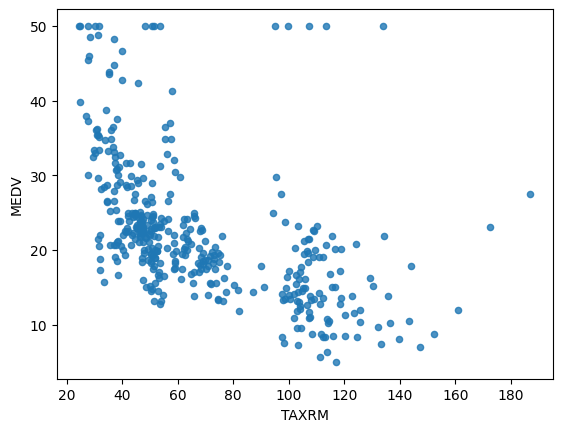

In [13]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [14]:
housing = start_train_set.drop("MEDV", axis = 1)
housing_labels = start_train_set["MEDV"].copy()

Missing Attributes

In [15]:
# To take care of missing attributes, you have three options:
    # 1. Get rid of the missing data point.
    # 2. Get rid of the whole attribute.
    # 3. Set the value to some value(0,mean,or meadian)

In [16]:
a = housing.dropna(subset=["RM"]) #options 1
a.shape
#the original housing dataframe remains unchanged

(403, 13)

In [17]:
housing.drop("RM", axis=1).shape #option 2
#Note that their is no RM column and original housing dataframe remain unchanged

(404, 12)

In [18]:
median = housing["RM"].median() #option 3
housing ["RM"].fillna(median).head()
#note that originla data frame remain unchanged

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
Name: RM, dtype: float64

In [19]:
housing.describe() # before we started filling missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,403.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279176,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.713717,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [20]:
# imputer = SimpleImputer(strategy="median")
# imputer.fit(housing)

In [21]:
# imputer.statistics_

In [22]:
# X = imputer.transform(housing) #numpy array

In [23]:
# housing_tr = pd.DataFrame(X, columns=housing.columns)
# housing_tr.describe()

Scikit-learn Design

Primarily, three types of objects
1. Estimators:
    It estimates some parameter based on a dataset. Eg. imputer
    It has a fit method and transform method.
        Fit method- Fits the dataset and calculates internal parameters.

2. Transformers:
    Transforms method takes input and return output based on the learnings from fit(). It also ahas a convenience function acalled fit_transform() which 
    fits and then transforms.

3. Predictors: 
    LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the 
    predictions.

Feature Scaling

Primarily, two types of feature scaling methods
    1. Min-max scaling (Normalization): (value-min)/(max-min)
        Sklearn provides a class called MinMaxScaler for this
    2. Standardizaton: (value-mean)/std
        sklearn provides a class called Standard Scaler for this

Creatinng a Pipeline

In [24]:


my_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                        ('std_scaler', StandardScaler()),])

In [25]:

# data = np.array([[1, 2, 3],[4, None, 6],[7, 8, 9]])
housing_num_tr1 = my_pipeline.fit_transform(housing)
housing_num_tr1


array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

Selecting a Desired model for Dragon Real Estattes

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
model = LinearRegression()
model.fit(housing_num_tr1, housing_labels)

LinearRegression()

In [40]:
some_data = housing.iloc[:5]
some_labe = housing_labels[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([23.94995586, 27.21874748, 20.58070767, 25.0439339 , 23.76352836])

In [41]:
print (list(some_labe))

[21.9, 24.5, 16.7, 23.1, 23.0]


In [42]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr1)
lin_mse = mean_squared_error (housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print (lin_rmse)

4.825287462662606


Using better evaluation technique - Cross Validation

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr1, housing_labels, scoring="neg_mean_squared_error", cv =10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([4.21935147, 5.31041315, 5.18096893, 4.18909735, 4.04950614,
       2.65348827, 5.18591843, 3.92431523, 3.40216843, 4.28030373])